In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset_path = '/content/drive/MyDrive/Poribohon-BD/train'
validation_dataset_path = '/content/drive/MyDrive/Poribohon-BD/validation'

In [4]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 7271 images belonging to 16 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 873 images belonging to 16 classes.


In [7]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bicycle
1 : Bike
2 : Boat
3 : Bus
4 : Car
5 : Cng
6 : Easy-bike
7 : Horse-cart
8 : Launch
9 : Leguna
10 : Multi-class Vehicles
11 : Rickshaw
12 : Tractor
13 : Truck
14 : Van
15 : Wheelbarrow


In [8]:
image_size = [150,150]
res_net_152_v2 = tf.keras.applications.ResNet152V2(input_shape = image_size+[3],weights='imagenet',include_top = False)
res_net_152_v2.output
for layer in res_net_152_v2.layers :
  layer.trainable = False

234561536/234545216 [==============================] - 1s 0us/step


In [9]:
x = Flatten()(res_net_152_v2.output)
prediction = Dense(16,activation="softmax")(x)
model = Model(inputs=res_net_152_v2.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']         

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
epoch = 10
history = model.fit(train_generator,
                    steps_per_epoch = None,
                    epochs = epoch,
                    validation_data = validation_generator,
                    validation_steps = None
                    )

Epoch 1/10
154/228 [===================>..........] - ETA: 13:20 - loss: 5.5690 - accuracy: 0.6196

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


228/228 [==============================] - 2776s 12s/step - loss: 5.5112 - accuracy: 0.6388 - val_loss: 5.8033 - val_accuracy: 0.6816
Epoch 2/10
228/228 [==============================] - 621s 3s/step - loss: 1.4472 - accuracy: 0.8853 - val_loss: 7.7452 - val_accuracy: 0.6861
Epoch 3/10
228/228 [==============================] - 632s 3s/step - loss: 1.0283 - accuracy: 0.9200 - val_loss: 7.2885 - val_accuracy: 0.6999
Epoch 4/10
228/228 [==============================] - 628s 3s/step - loss: 0.6519 - accuracy: 0.9515 - val_loss: 9.2950 - val_accuracy: 0.6930
Epoch 5/10
228/228 [==============================] - 624s 3s/step - loss: 0.6553 - accuracy: 0.9559 - val_loss: 8.0641 - val_accuracy: 0.7228
Epoch 6/10
228/228 [==============================] - 626s 3s/step - loss: 0.5387 - accuracy: 0.9660 - val_loss: 9.5843 - val_accuracy: 0.7033
Epoch 7/10
228/228 [==============================] - 626s 3s/step - loss: 0.6559 - accuracy: 0.9598 - val_loss: 10.3942 - val_accuracy: 0.7239
Epoch 8

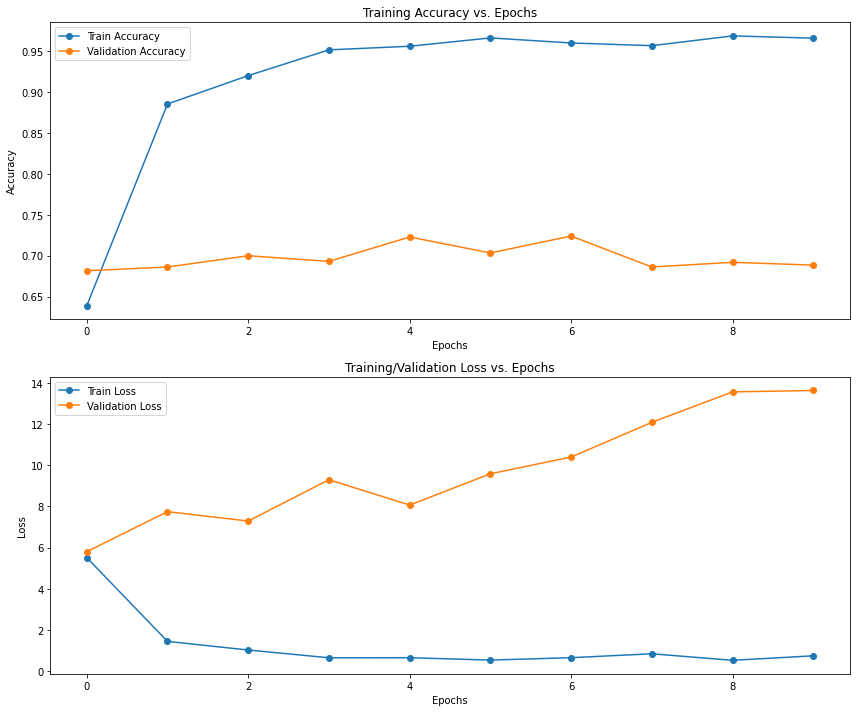

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [13]:
test_dataset = '/content/drive/MyDrive/Poribohon-BD/test/'

In [14]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 910 images belonging to 16 classes.


In [15]:
predictions = model.predict(test_generator)

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

29/29 [==============================] - 40s 1s/step - loss: 13.0936 - accuracy: 0.6912
Test Loss:     13.09357738494873
Test Accuracy: 0.6912087798118591


In [17]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

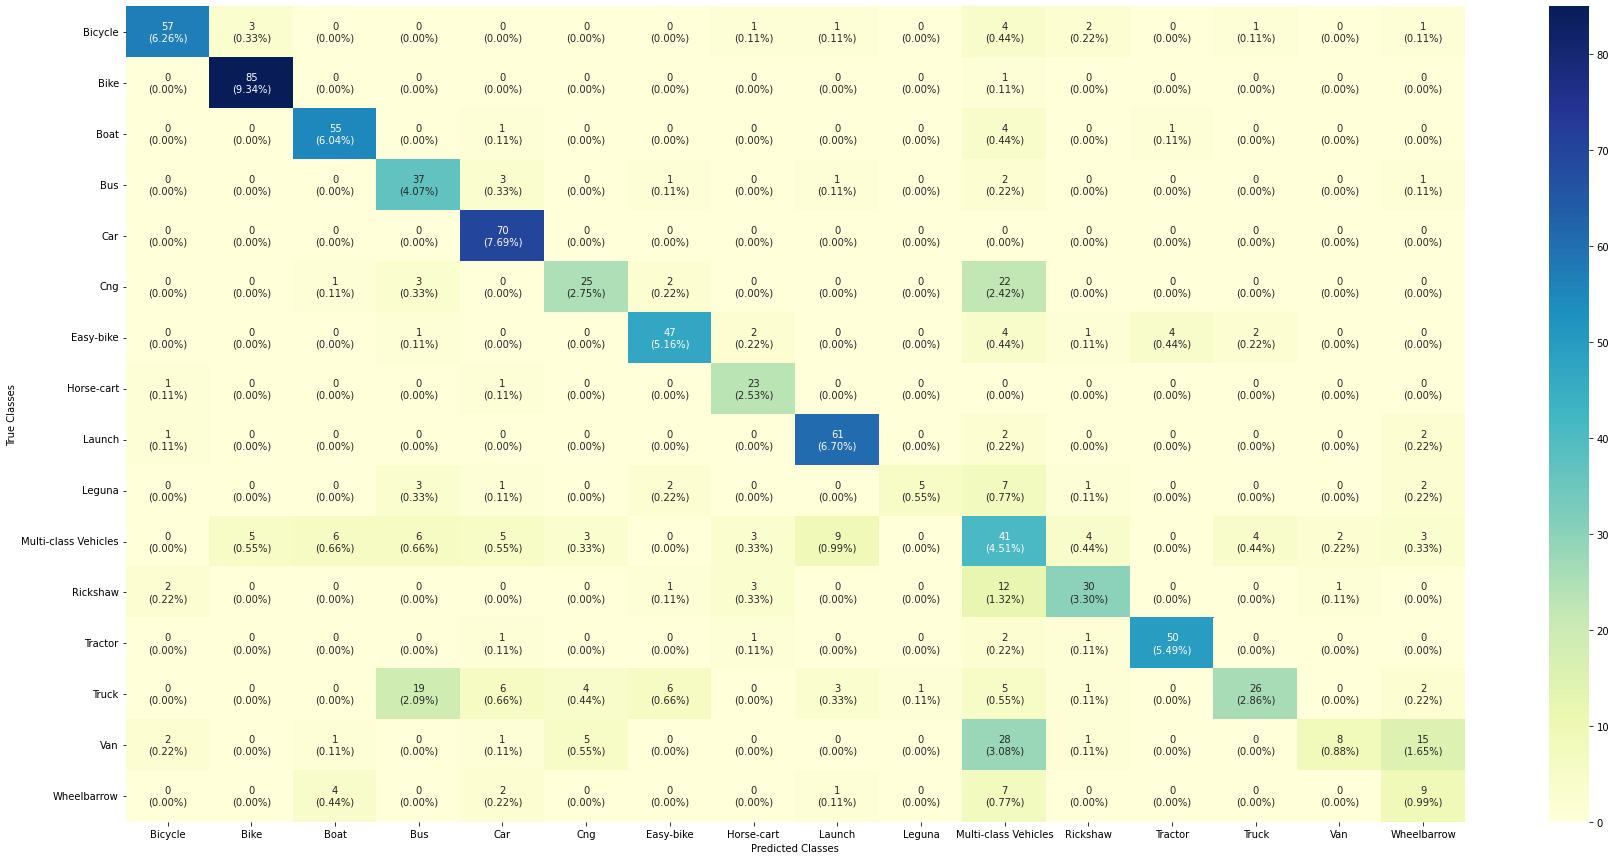

In [18]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(16, 16)

plt.figure(figsize = (30, 15))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [19]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                      precision    recall  f1-score   support

             Bicycle       0.90      0.81      0.86        70
                Bike       0.91      0.99      0.95        86
                Boat       0.82      0.90      0.86        61
                 Bus       0.54      0.82      0.65        45
                 Car       0.77      1.00      0.87        70
                 Cng       0.68      0.47      0.56        53
           Easy-bike       0.80      0.77      0.78        61
          Horse-cart       0.70      0.92      0.79        25
              Launch       0.80      0.92      0.86        66
              Leguna       0.83      0.24      0.37        21
Multi-class Vehicles       0.29      0.45      0.35        91
            Rickshaw       0.73      0.61      0.67        49
             Tractor       0.91      0.91      0.91        55
               Truck       0.79      0.36      0.49        73
                 Van       0.73      0.13      0.22        61
       